# Imports 

In [22]:
import matplotlib.pyplot as plt
import sys  
import os

# Get working director, parent directory, and source directory
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
src_dir = os.path.join(parent_dir, 'src')

# Add data simulator to path
sys.path.append(src_dir+"/data_simulator")
# Import data simulator
from SERSGenerator import SERSGenerator, pseudo_voigt

Create SERS generator object and generate data 

In [26]:
# Create a generator with a 20x20 pixel image, 500 wavenumbers, seed 100, and fixed Lorentzian
gen = SERSGenerator((20,20), 500, seed=100, eta=[0,0])

# Example 1
Generate and plot a SERS spectrum

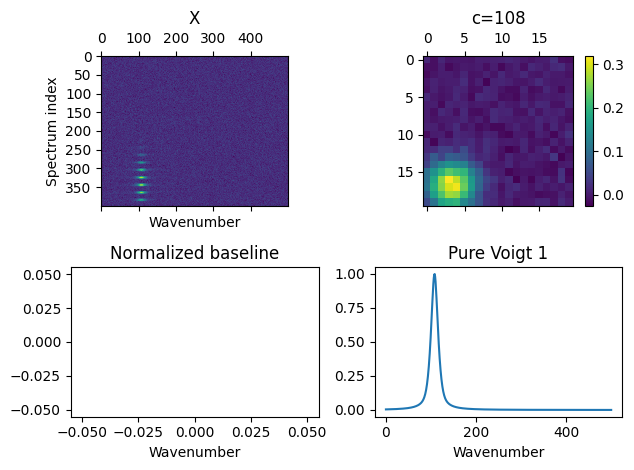

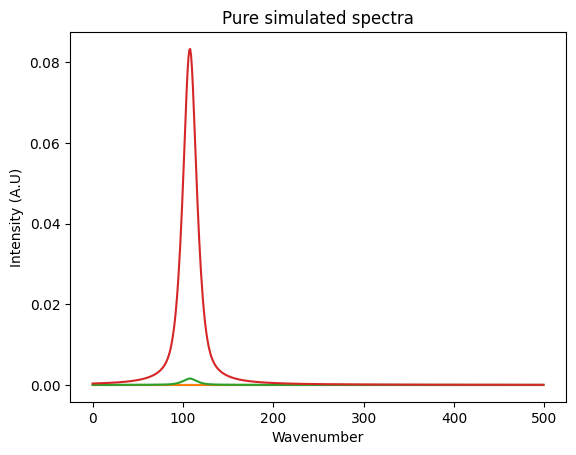

In [28]:
# Generate data with one hotspot, 1 peak, 0.1 measurement error, 1 signal-to-backgorund ratio
X = gen.generate(1,1,0.1,1, plot=False, background='none')

c = gen.c
mapsize = gen.mapsize

fig, axs = plt.subplots(2,2)

# SERS Matrix
axs[0,0].matshow(X)
axs[0,0].set_xlabel('Wavenumber')
axs[0,0].set_ylabel('Spectrum index')
axs[0,0].set_title('X')


# Loadings of peak 1
mappable = axs[0,1].matshow(X[:, round(gen.c[0])].reshape(*mapsize))
axs[0,1].set_title(f'c={round(gen.c[0])}')
plt.colorbar(mappable=mappable, ax=axs[0,1])

axs[1,0].plot(gen.B)
axs[1,0].set_xlabel('Wavenumber')
axs[1,0].set_title('Normalized baseline')


axs[1,1].plot(gen.Vp[0,:])
axs[1,1].set_xlabel('Wavenumber')
axs[1,1].set_title('Pure Voigt 1')


fig.tight_layout()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot((gen.alpha @ gen.Vp)[::100,:].T)
ax.set_title('Pure simulated spectra')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity (A.U)')
plt.show()

# Example 2
4 hotspots and 2 peaks


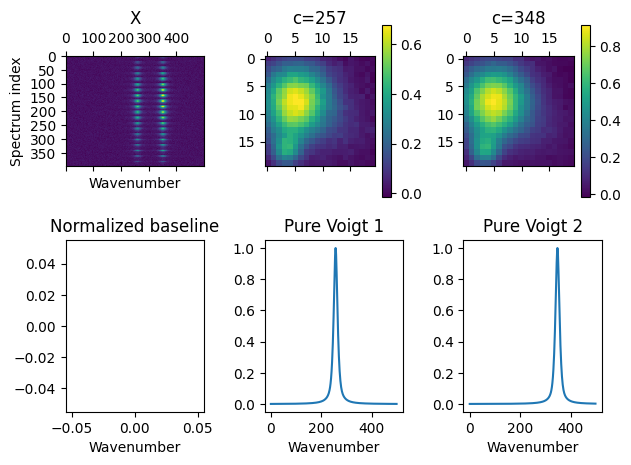

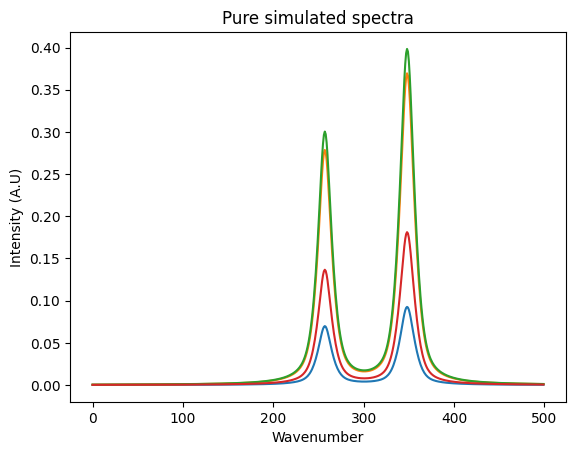

In [31]:

# gen = SERSGenerator((20,20), 500, 100, eta=[0,0])

X = gen.generate(4,2,0.1,1, plot=False, background='none')
fig, axs = plt.subplots(2,3)

c = gen.c
mapsize = gen.mapsize

# SERS Matrix
axs[0,0].matshow(X)
axs[0,0].set_xlabel('Wavenumber')
axs[0,0].set_ylabel('Spectrum index')
axs[0,0].set_title('X')


# Loadings of peak 1
mappable = axs[0,1].matshow(X[:, round(gen.c[0])].reshape(*mapsize))
axs[0,1].set_title(f'c={round(gen.c[0])}')
plt.colorbar(mappable=mappable, ax=axs[0,1])

# Loadings of peak 2
mappable = axs[0,2].matshow(X[:, round(gen.c[1])].reshape(*mapsize))
axs[0,2].set_title(f'c={round(gen.c[1])}')
plt.colorbar(mappable=mappable, ax=axs[0,2])

axs[1,0].plot(gen.B)
axs[1,0].set_xlabel('Wavenumber')
axs[1,0].set_title('Normalized baseline')


axs[1,1].plot(gen.Vp[0,:])
axs[1,1].set_xlabel('Wavenumber')
axs[1,1].set_title('Pure Voigt 1')

axs[1,2].plot(gen.Vp[1,:])
axs[1,2].set_xlabel('Wavenumber')
axs[1,2].set_title('Pure Voigt 2')



fig.tight_layout()

fig = plt.figure()
ax = fig.add_subplot()
ax.plot((gen.alpha @ gen.Vp)[::100,:].T)
ax.set_title('Pure simulated spectra')
ax.set_xlabel('Wavenumber')
ax.set_ylabel('Intensity (A.U)')
plt.show()